In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data understanding
data = pd.read_csv('chirper-happiness.csv')
print(data.shape, data.info(), data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 6 columns):
Id2                      2110 non-null int64
totalGroup1              2110 non-null int64
totalGroup2              2110 non-null int64
percent_bachelorPlus     2110 non-null float64
meanvalence              2110 non-null float64
households_meanIncome    2110 non-null int64
dtypes: float64(2), int64(4)
memory usage: 98.9 KB
(2110, 6) None Index(['Id2', 'totalGroup1', 'totalGroup2', 'percent_bachelorPlus',
       'meanvalence', 'households_meanIncome'],
      dtype='object')


In [4]:
data.isnull().sum()

Id2                      0
totalGroup1              0
totalGroup2              0
percent_bachelorPlus     0
meanvalence              0
households_meanIncome    0
dtype: int64

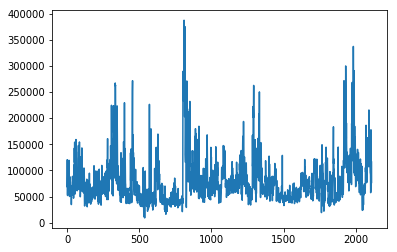

In [5]:
plt.plot(data['households_meanIncome'])
plt.show()

1. Ground Truth Model

In [92]:
# get correlation between features
df = pd.DataFrame(data,columns=['Id2','totalGroup1','totalGroup2','percent_bachelorPlus','meanvalence','households_meanIncome'])

In [93]:
df['percent_bachelorPlus'].corr(df['meanvalence'])

0.4572668075485826

In [7]:
df['households_meanIncome'].corr(df['meanvalence'])

0.3110131455420811

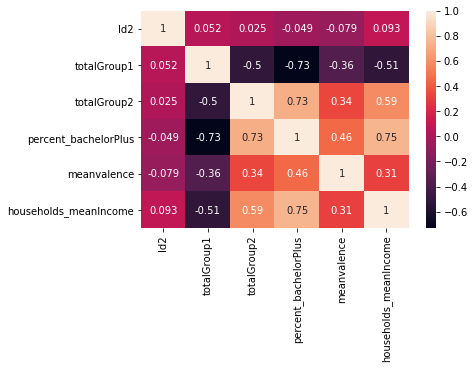

In [8]:
corrMatrix = df.corr()
# plot correlation map
sns.heatmap(corrMatrix, annot=True)
plt.show()

Text(0.5, 0.98, 'percent_bachelorPlus and meanvalence-Group 1')

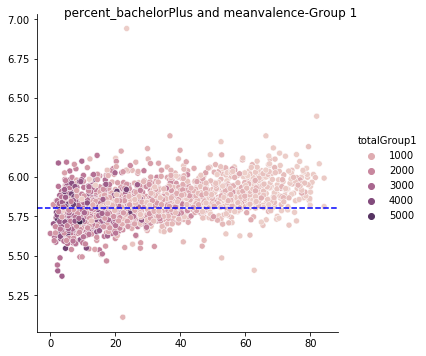

In [96]:
fig = sns.relplot(x="percent_bachelorPlus", y="meanvalence", hue="totalGroup1", data=df)
fig.map(plt.axhline, y=5.8, ls='--', c='blue')
fig.fig.suptitle('percent_bachelorPlus and meanvalence-Group 1')

Text(0.5, 0.98, 'households_meanIncome and meanvalence-Group 1')

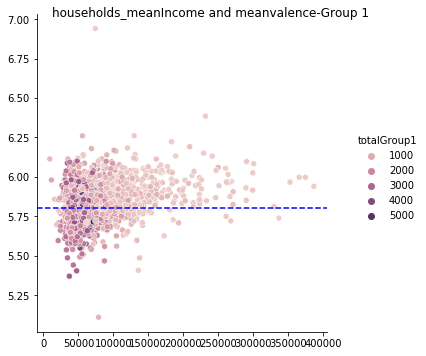

In [97]:
fig1 = sns.relplot(x="households_meanIncome", y="meanvalence", hue="totalGroup1", data=df)
fig1.map(plt.axhline, y=5.8, ls='--', c='blue')
fig1.fig.suptitle('households_meanIncome and meanvalence-Group 1')

Text(0.5, 0.98, 'percent_bachelorPlus and meanvalence-Group 2')

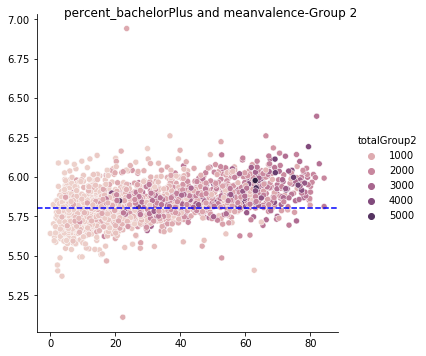

In [98]:
fig2 = sns.relplot(x="percent_bachelorPlus", y="meanvalence", hue="totalGroup2", data=df)
fig2.map(plt.axhline, y=5.8, ls='--', c='blue')
fig2.fig.suptitle('percent_bachelorPlus and meanvalence-Group 2')

Text(0.5, 0.98, 'households_meanIncome and meanvalence-Group 2')

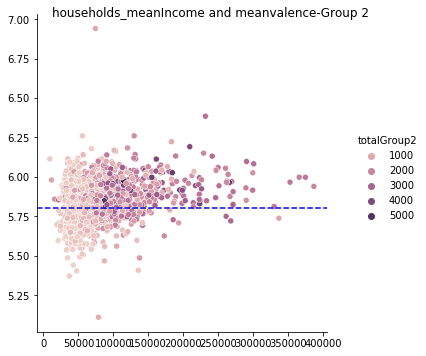

In [99]:
fig3 = sns.relplot(x="households_meanIncome", y="meanvalence", hue="totalGroup2", data=df)
fig3.map(plt.axhline, y=5.8, ls='--', c='blue')
fig3.fig.suptitle('households_meanIncome and meanvalence-Group 2')

2. Ethnic Group Aware Model

In [10]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

y = df.meanvalence
x = df.drop('meanvalence', axis=1)

# 70% of dataset is train set, 30% is test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(1477, 5) (1477,)
(633, 5) (633,)


In [73]:
# rescale the features
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler and apply it to the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x = sc.fit_transform(x)
print (x_test.shape)

(2110, 5)


In [74]:
# Build a linear regression model
from sklearn import linear_model
linear_model = linear_model.LinearRegression()

# Train the model using the training sets
linear_model.fit(x_train, y_train)

# Make predictions using the entire data set
y_pred = linear_model.predict(x)

In [83]:
linear_model.coef_

array([-0.00627846, -0.00412895,  0.00289627,  0.05019531, -0.0040287 ])

In [100]:
a1 = pd.Series(y_pred, name='y_pred')
tem = pd.concat([df,a1],axis=1)

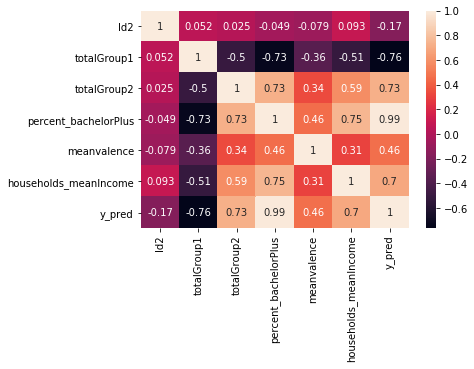

In [101]:
corr_m = tem.corr()
sns.heatmap(corr_m,annot=True)
plt.show()

Text(0.5, 0.98, 'percent_bachelorPlus and Aware Model Predicted-Group 1')

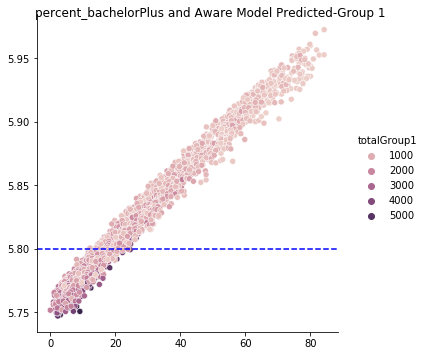

In [102]:
fig4 = sns.relplot(x="percent_bachelorPlus", y = y_pred, hue="totalGroup1", data=df)
fig4.map(plt.axhline, y=5.8, ls='--', c='blue')
fig4.fig.suptitle('percent_bachelorPlus and Aware Model Predicted-Group 1')

Text(0.5, 0.98, 'percent_bachelorPlus and Aware Model Predicted-Group 2')

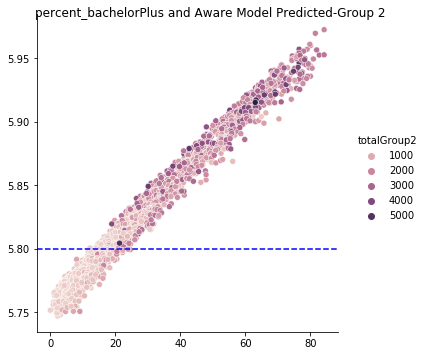

In [103]:
fig5 = sns.relplot(x="percent_bachelorPlus", y= y_pred, hue="totalGroup2", data=df)
fig5.map(plt.axhline, y=5.8, ls='--', c='blue')
fig5.fig.suptitle('percent_bachelorPlus and Aware Model Predicted-Group 2')

Text(0.5, 0.98, 'households_meanIncome and Aware Model Predicted-Group 1')

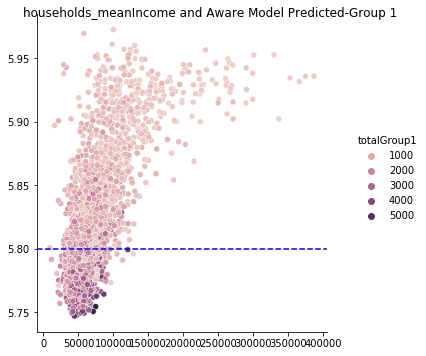

In [104]:
fig6 = sns.relplot(x="households_meanIncome", y= y_pred, hue="totalGroup1", data=df)
fig6.map(plt.axhline, y=5.8, ls='--', c='blue')
fig6.fig.suptitle('households_meanIncome and Aware Model Predicted-Group 1')

Text(0.5, 0.98, 'households_meanIncome and Aware Model Predicted-Group 2')

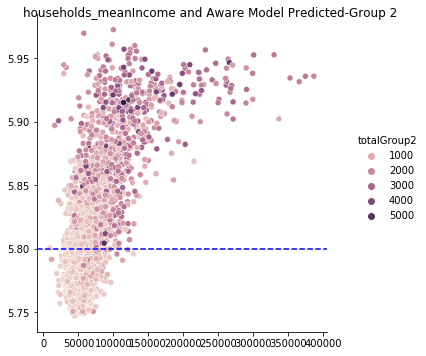

In [105]:
fig7 = sns.relplot(x="households_meanIncome", y= y_pred, hue="totalGroup2", data=df)
fig7.map(plt.axhline, y=5.8, ls='--', c='blue')
fig7.fig.suptitle('households_meanIncome and Aware Model Predicted-Group 2')

3. Ethnic Group Blind Model

In [42]:
# split data into train and test sets

x1 = pd.DataFrame(data,columns=['Id2','percent_bachelorPlus','households_meanIncome'])


# 70% of dataset is train set, 30% is test set
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.30, random_state=42)

In [49]:
# rescale the features
x1_train = sc.fit_transform(x1_train)
x1_test = sc.fit_transform(x1)

In [50]:
# Train the model using the training sets
blind_model = linear_model.fit(x1_train, y1_train)

# Make predictions using the entire data set
y_pred_blind = linear_model.predict(x1_test)

In [84]:
blind_model.coef_

array([-0.00617587,  0.05545943, -0.00419361])

In [107]:
b1 = pd.Series(y_pred_blind, name='y_pred_blind')
tem1 = pd.concat([df,b1],axis=1)

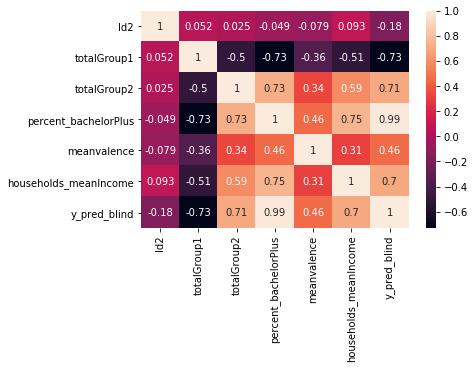

In [108]:
corr_m1 = tem1.corr()
sns.heatmap(corr_m1,annot=True)
plt.show()

Text(0.5, 0.98, 'percent_bachelorPlus and Blind Model Predicted-Group 1')

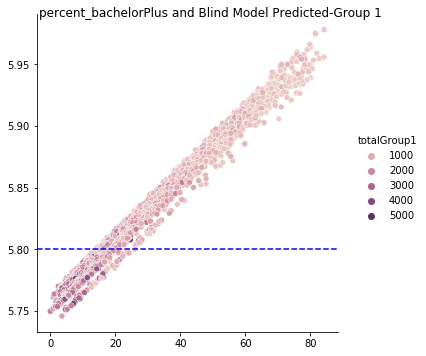

In [109]:
fig8 = sns.relplot(x="percent_bachelorPlus", y= y_pred_blind, hue="totalGroup1", data=df)
fig8.map(plt.axhline, y=5.8, ls='--', c='blue')
fig8.fig.suptitle('percent_bachelorPlus and Blind Model Predicted-Group 1')

Text(0.5, 0.98, 'percent_bachelorPlus and Blind Model Predicted-Group 2')

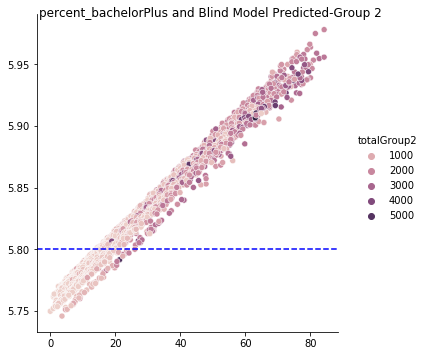

In [110]:
fig9 = sns.relplot(x="percent_bachelorPlus", y= y_pred_blind, hue="totalGroup2", data=df)
fig9.map(plt.axhline, y=5.8, ls='--', c='blue')
fig9.fig.suptitle('percent_bachelorPlus and Blind Model Predicted-Group 2')

Text(0.5, 0.98, 'households_meanIncome and Blind Model Predicted-Group 1')

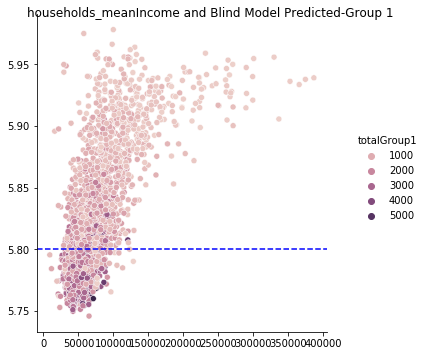

In [111]:
fig10 = sns.relplot(x="households_meanIncome", y= y_pred_blind, hue="totalGroup1", data=df)
fig10.map(plt.axhline, y=5.8, ls='--', c='blue')
fig10.fig.suptitle('households_meanIncome and Blind Model Predicted-Group 1')

Text(0.5, 0.98, 'households_meanIncome and Blind Model Predicted-Group 2')

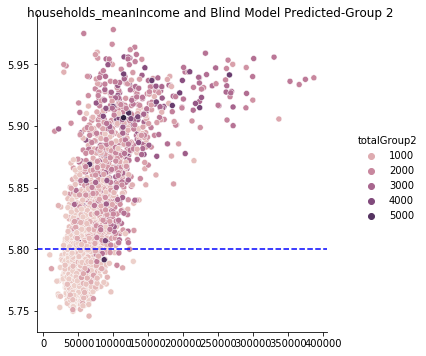

In [112]:
fig11 = sns.relplot(x="households_meanIncome", y= y_pred_blind, hue="totalGroup2", data=df)
fig11.map(plt.axhline, y=5.8, ls='--', c='blue')
fig11.fig.suptitle('households_meanIncome and Blind Model Predicted-Group 2')

4. Fair Model

In [56]:
# code adopted from file fair_var.py provided by professors
import numpy as np
import pandas as pd
import scipy

def gen_latent_fast(df0, prot_col, tar_col):
    """
    generate a representation for target column which is independent from
    any columns in prot_col
    df0: a data frame
    prot_col: list of strings, the protected columns
    tar_col: string, the target (outcome) column
    """
    df = df0.copy()
    for column in df.columns:
        df[column] = df[column] - df[column].mean()
    df_protect = df[prot_col]
    dfv_protect = df_protect.values
    dfv_target = df[tar_col].values
    base_protect = scipy.linalg.orth(dfv_protect)
    for i in range(base_protect.shape[1]):
        #print(base_protect[:,i].shape)
        dfv_target = dfv_target - np.inner(dfv_target, base_protect[:,i])*base_protect[:,i]
    return dfv_target

def gen_latent_nonparam_regula(df0, prot_col, tar_col, lbd):
    """
    generate a fair representation at a certain level define by lbd
    df0: a data frame
    prot_col: list of strings, the protected columns
    tar_col: string, the target (outcome) column
    lbd: float number between 0 and 1, 0 means totally fair; 1 means same as outcome
    """

    dfv_target = df0[tar_col].values
    dfv_mean = df0[tar_col].mean()
    dfv_target = dfv_target - dfv_mean

    latent0 = gen_latent_fast(df0, prot_col, tar_col)

    return latent0 + lbd*(dfv_target - latent0)

In [114]:
y_fair_mod = gen_latent_nonparam_regula(data, ['totalGroup1','totalGroup2'], 'meanvalence',0)
y_fair_mod = y_fair_mod + data['meanvalence'].mean()

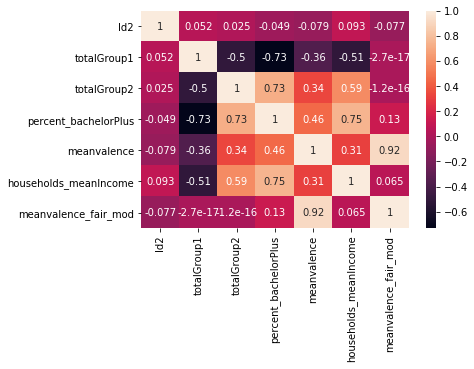

In [115]:
c1 = pd.Series(y_fair_mod, name="meanvalence_fair_mod")
tem3 = pd.concat([data,c1], axis=1)
corr_matrix = data.corr()
sns.heatmap(tem3.corr(), annot=True)
plt.show()

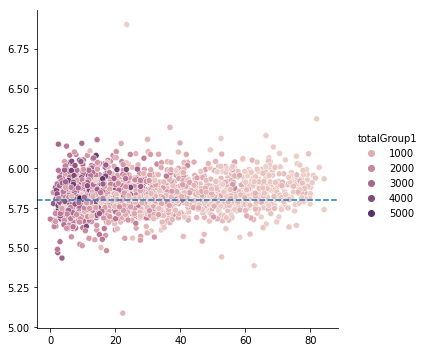

In [117]:
fig1 = sns.relplot(x='percent_bachelorPlus', y = y_fair_mod, hue='totalGroup1', data=data)
fig1.map(plt.axhline, y=5.8, ls='--')

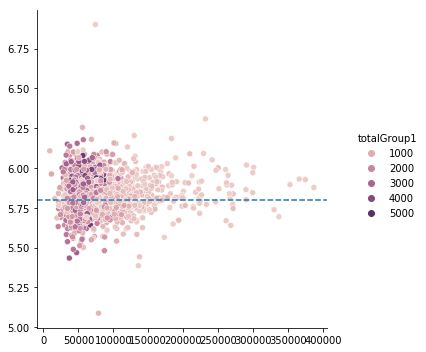

In [118]:
fig2 = sns.relplot(x='households_meanIncome', y = y_fair_mod, hue='totalGroup1', data=data)
fig2.map(plt.axhline, y=5.8, ls='--')

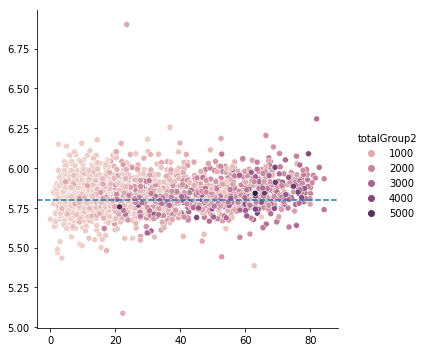

In [119]:
fig3 = sns.relplot(x='percent_bachelorPlus', y = y_fair_mod, hue='totalGroup2', data=data)
fig3.map(plt.axhline, y=5.8, ls='--')

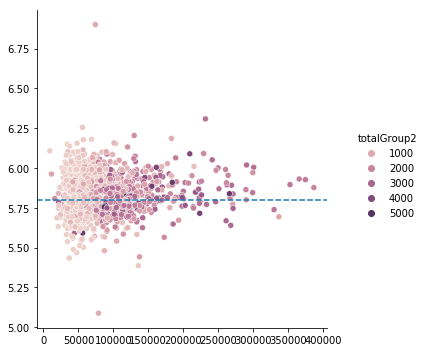

In [120]:
fig4 = sns.relplot(x='households_meanIncome', y = y_fair_mod, hue='totalGroup2', data=data)
fig4.map(plt.axhline, y=5.8, ls='--')

In [125]:
y = y_fair_mod
x = data.drop('meanvalence', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [127]:
x_train2 = x_train.drop('totalGroup1', axis = 1)
x_train2 = x_train2.drop('totalGroup2', axis = 1)
x2 = x.drop('totalGroup1', axis = 1)
x2 = x2.drop('totalGroup2', axis = 1)
# Train the model using the training sets
fair_model = linear_model.fit(x_train2, y_train)

# Make predictions using the entire data set
y_pred_fair = linear_model.predict(x2)

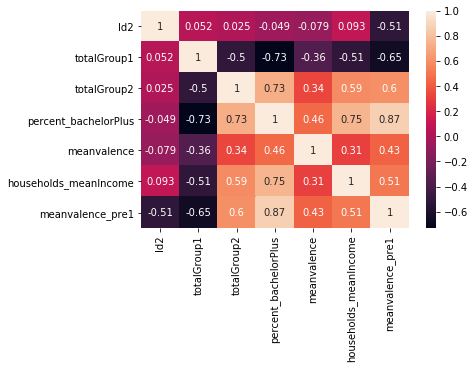

In [128]:
d1 = pd.Series(y_pred_fair, name="meanvalence_pre1")
tem4 = pd.concat([data,d1], axis=1)
corr_matrix = tem4.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

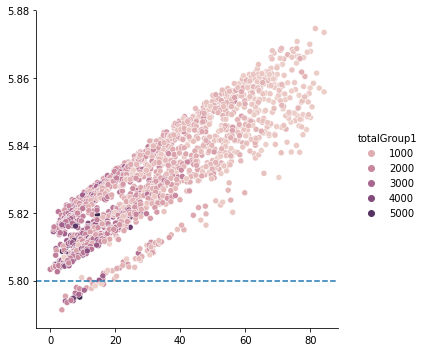

In [129]:
fig1 = sns.relplot(x='percent_bachelorPlus', y = y_pred_fair, hue='totalGroup1', data=data)
fig1.map(plt.axhline, y=5.8, ls='--')

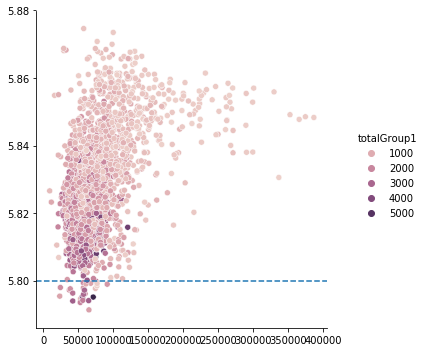

In [130]:
fig2 = sns.relplot(x='households_meanIncome', y = y_pred_fair, hue='totalGroup1', data=data)
fig2.map(plt.axhline, y=5.8, ls='--')

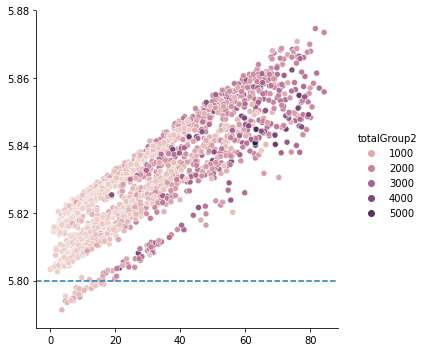

In [131]:
fig3 = sns.relplot(x='percent_bachelorPlus', y = y_pred_fair, hue='totalGroup2', data=data)
fig3.map(plt.axhline, y=5.8, ls='--')

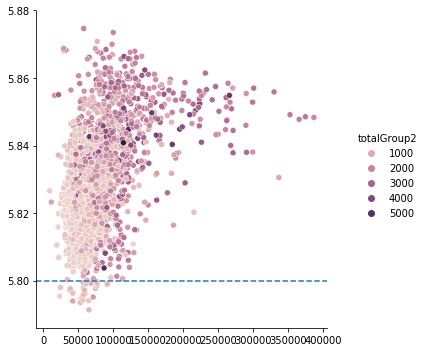

In [133]:
fig4 = sns.relplot(x='households_meanIncome', y = y_pred_fair, hue='totalGroup2', data=data)
fig4.map(plt.axhline, y=5.8, ls='--')